# Laptop Price Analysis 

## 1. Basic Info and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load your actual dataset (replace 'laptops.csv' with your filename if needed)
df = pd.read_csv('laptop_prices.csv')  


print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

## 2. Feature Engineering

In [2]:

df['SecondaryStorage'] = df['SecondaryStorage'].fillna(0)
df['SecondaryStorageType'] = df['SecondaryStorageType'].fillna('None')

df['TotalStorage'] = df['PrimaryStorage'] + df['SecondaryStorage']
df['Pixels'] = df['ScreenW'] * df['ScreenH']
df['PPI'] = ((df['ScreenW']**2 + df['ScreenH']**2)**0.5) / df['Inches']

## 3. Visual Explorations

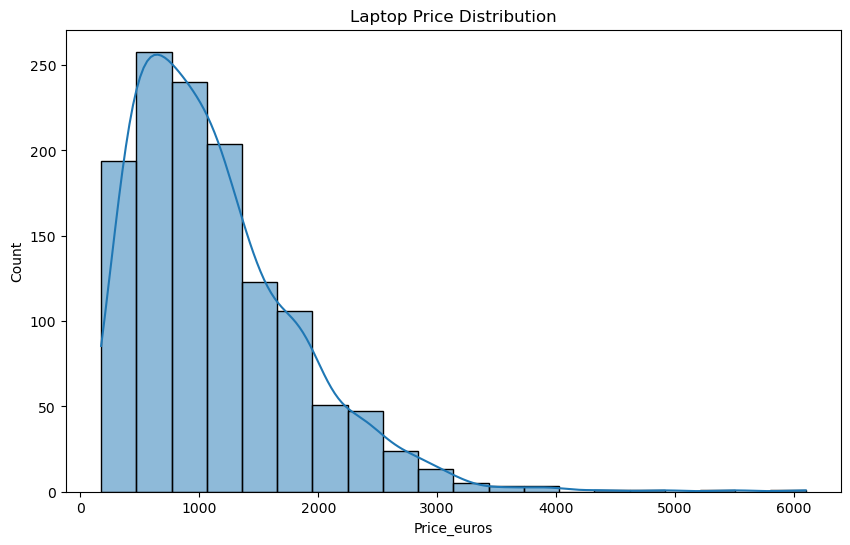

In [3]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], kde=True, bins=20)
plt.title('Laptop Price Distribution')
plt.show()


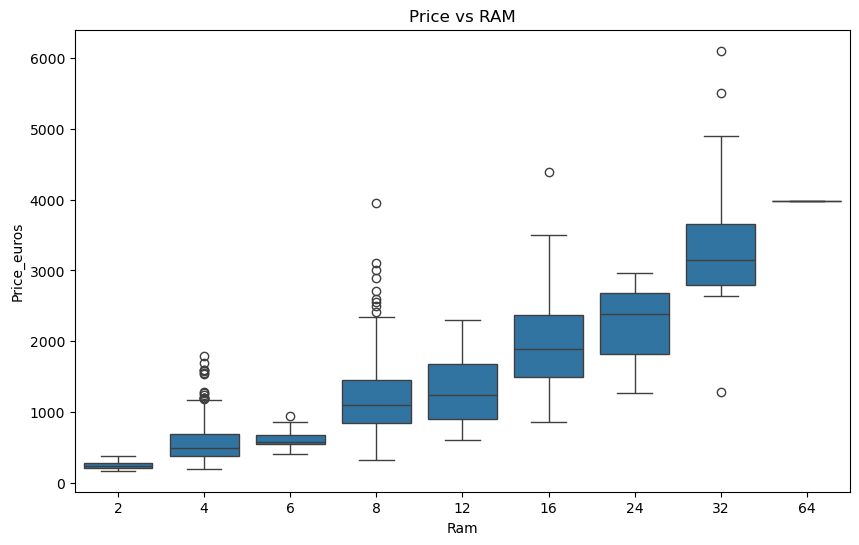

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ram', y='Price_euros', data=df)
plt.title('Price vs RAM')
plt.show()



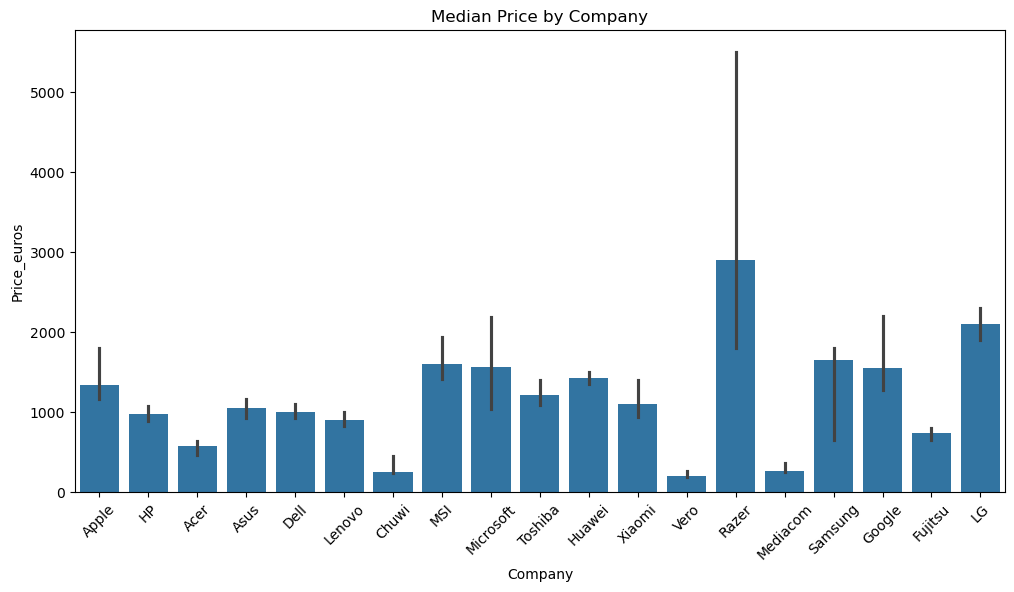

In [5]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Price_euros', data=df, estimator=np.median)
plt.title('Median Price by Company')
plt.xticks(rotation=45)
plt.show()


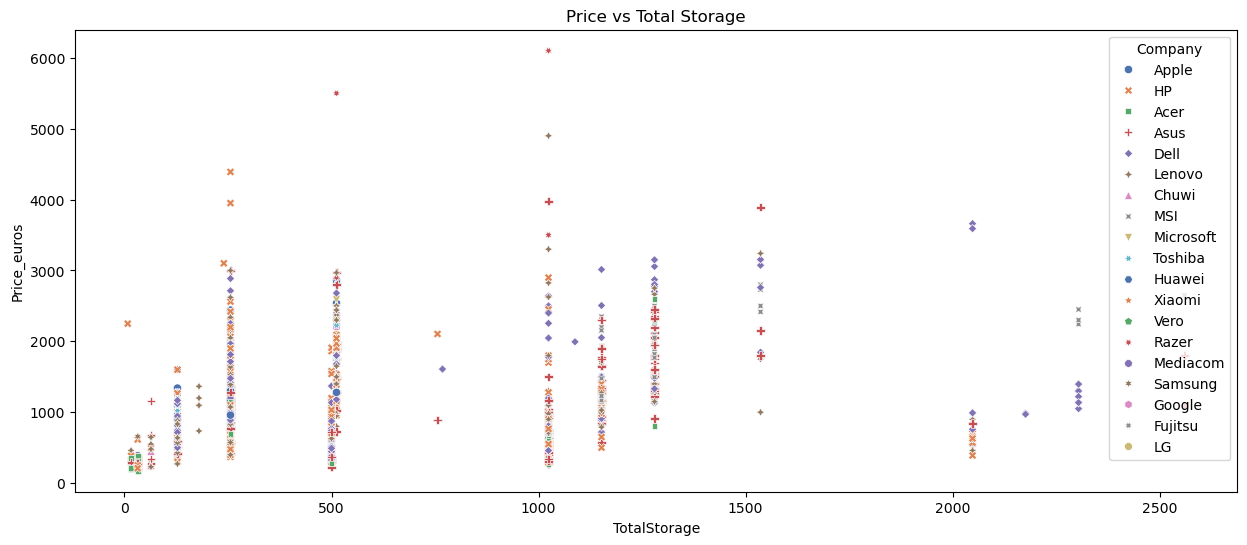

In [6]:

plt.figure(figsize=(15, 6))
sns.scatterplot(x='TotalStorage', y='Price_euros', hue='Company', palette="deep", style="Company", data=df)
plt.title('Price vs Total Storage')
plt.show()


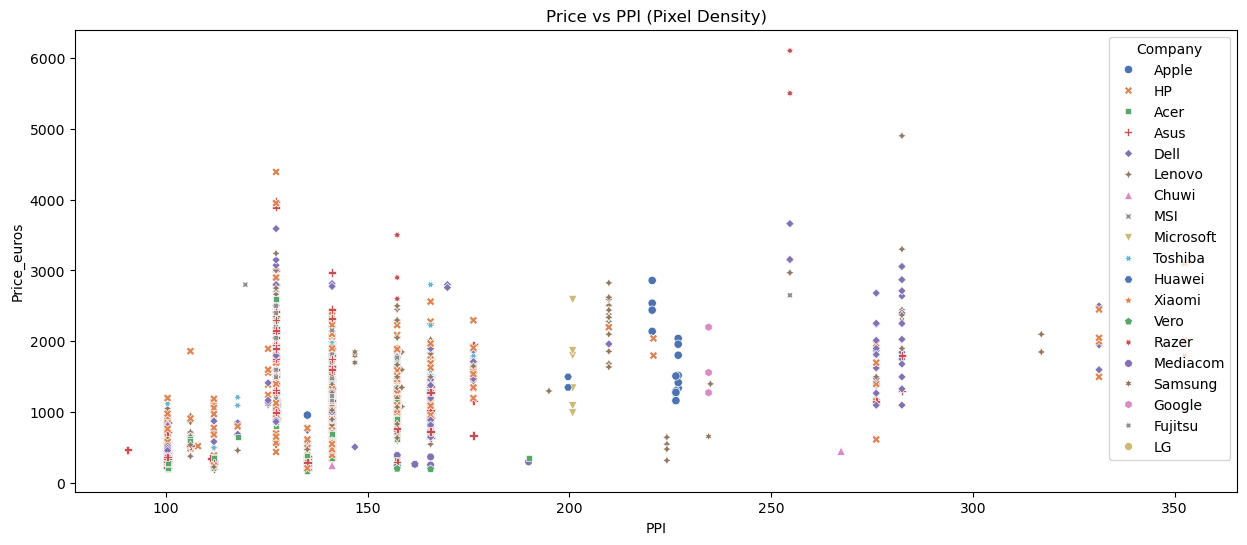

In [7]:

plt.figure(figsize=(15, 6))
sns.scatterplot(x='PPI', y='Price_euros', hue='Company', palette="deep", style="Company", data=df)
plt.title('Price vs PPI (Pixel Density)')
plt.show()


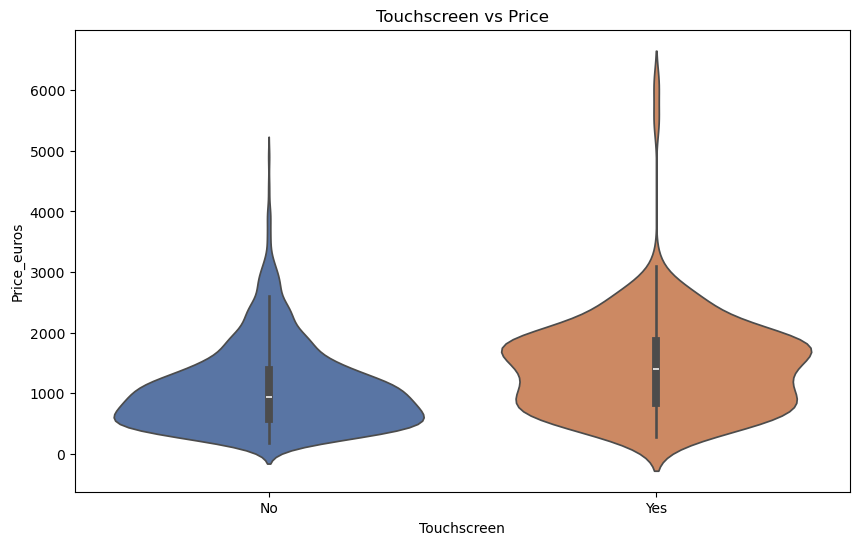

In [8]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Touchscreen', y='Price_euros', palette="deep", data=df)
plt.title('Touchscreen vs Price')
plt.show()


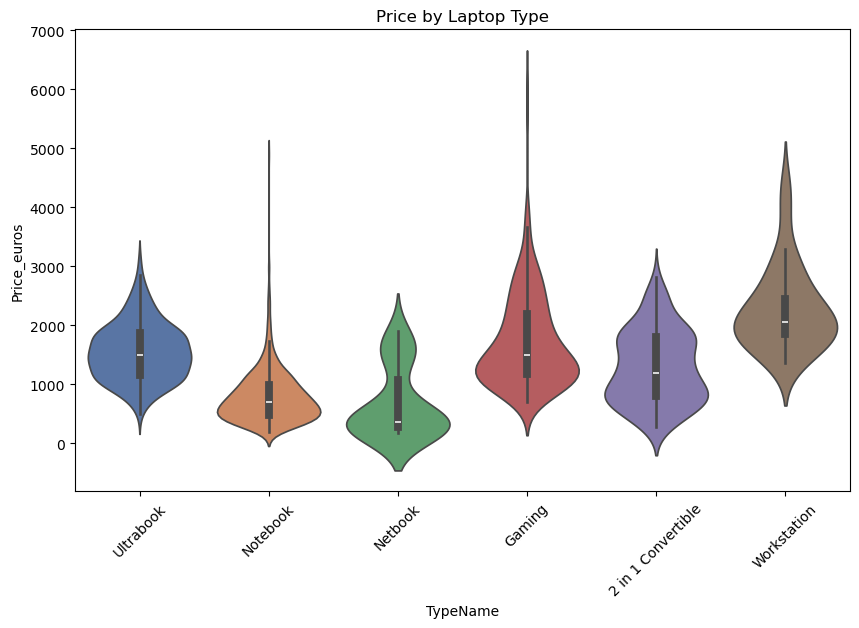

In [9]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='TypeName', y='Price_euros', palette="deep", data=df)
plt.title('Price by Laptop Type')
plt.xticks(rotation=45)
plt.show()

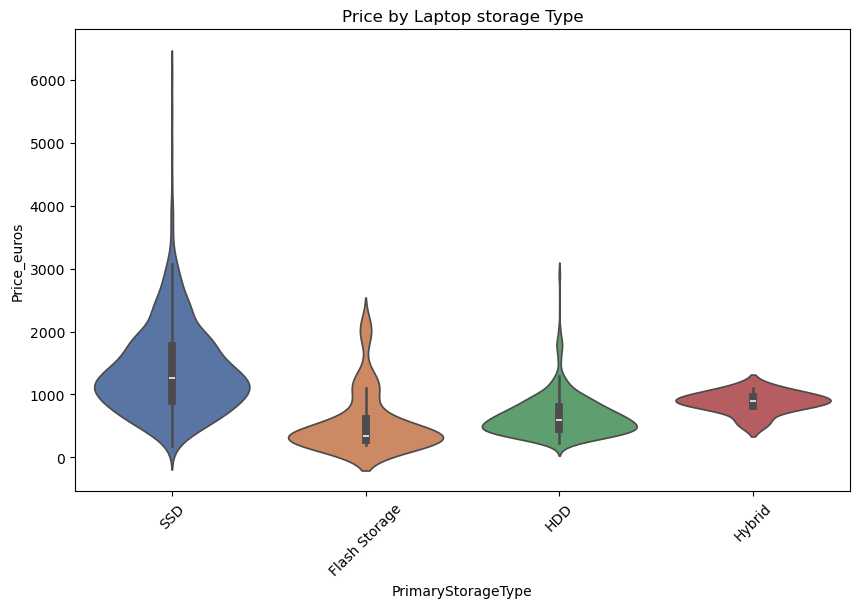

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='PrimaryStorageType', y='Price_euros', palette="deep", data=df)
plt.title('Price by Laptop storage Type')
plt.xticks(rotation=45)
plt.show()

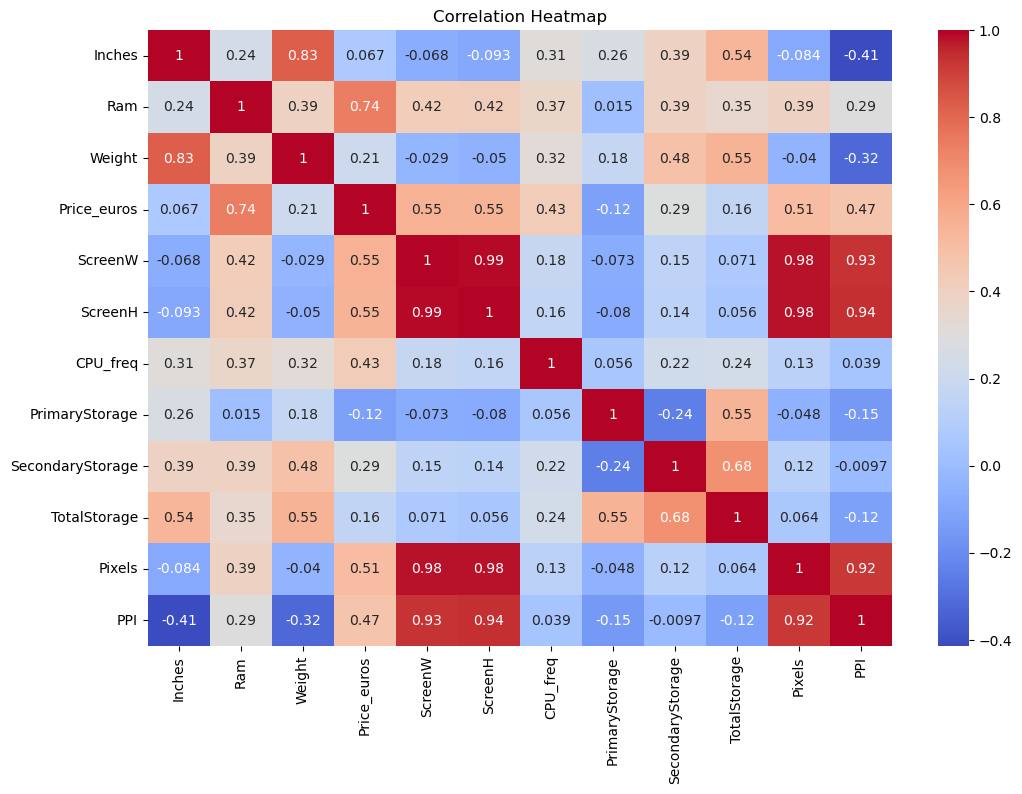

In [11]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Top 10 expensive laptops

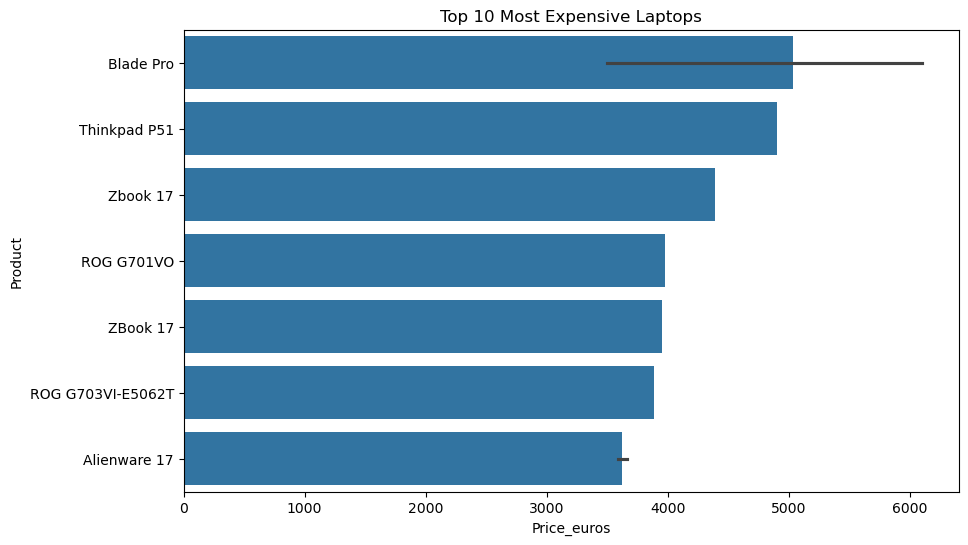

In [12]:
top10 = df.sort_values(by='Price_euros', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Price_euros', y='Product', data=top10)
plt.title('Top 10 Most Expensive Laptops')
plt.show()



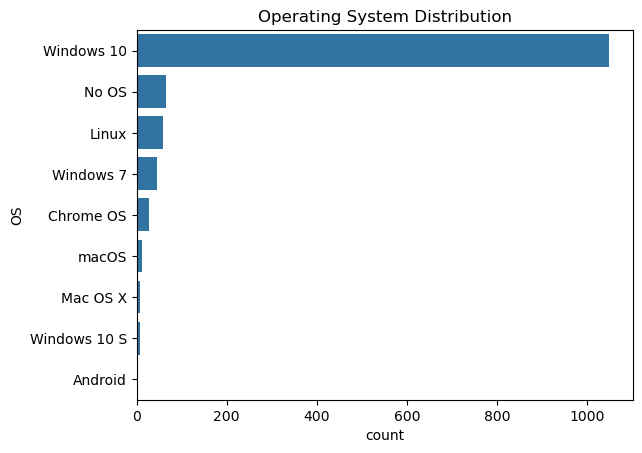

In [13]:
# Countplot of OS
g = sns.countplot(y='OS', data=df, order=df['OS'].value_counts().index)
g.set_title('Operating System Distribution')
plt.show()

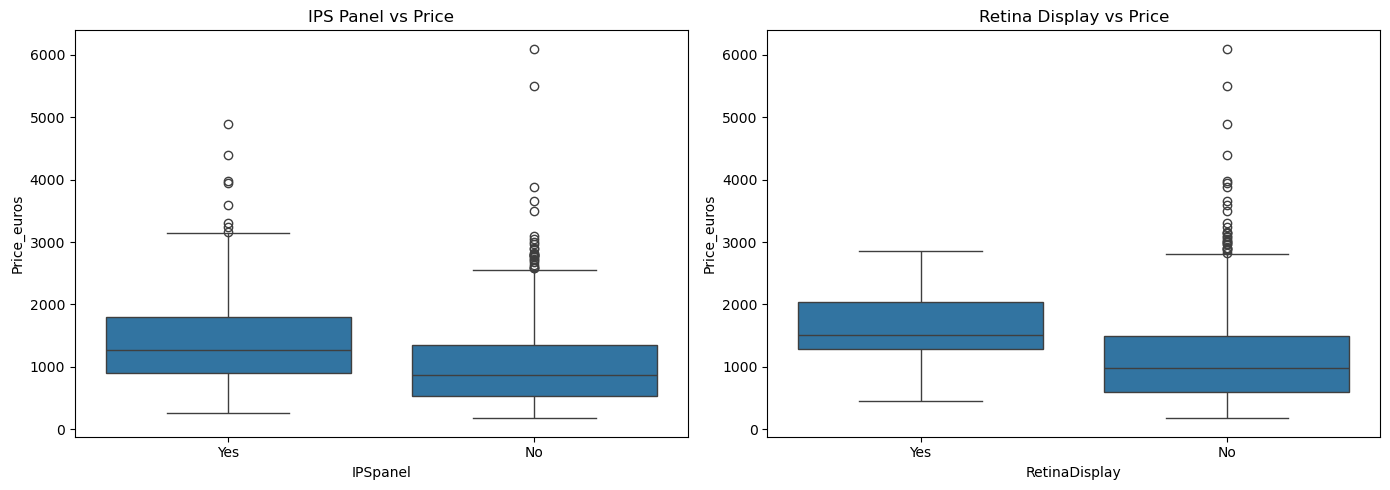

In [14]:
# Distribution of laptops with IPS Panel and Retina Display
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x='IPSpanel', y='Price_euros', data=df, ax=axs[0])
axs[0].set_title('IPS Panel vs Price')
sns.boxplot(x='RetinaDisplay', y='Price_euros', data=df, ax=axs[1])
axs[1].set_title('Retina Display vs Price')
plt.tight_layout()
plt.show()



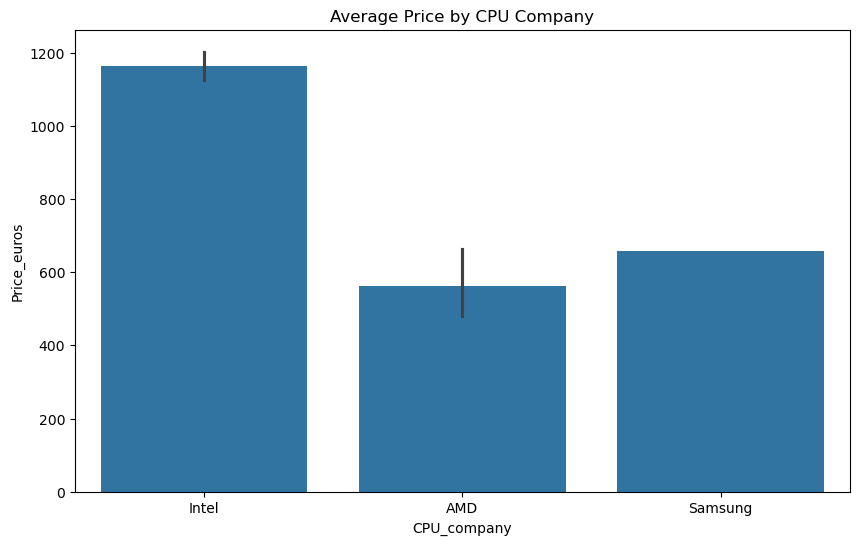

In [15]:
# Grouped barplot for CPU Company vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='CPU_company', y='Price_euros', data=df, estimator=np.mean)
plt.title('Average Price by CPU Company')
plt.show()



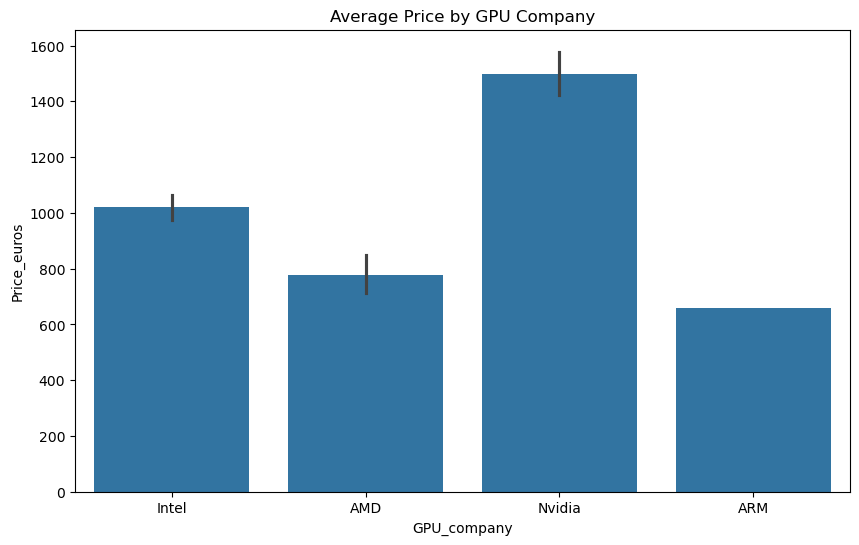

In [16]:
# Grouped barplot for GPU Company vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='GPU_company', y='Price_euros', data=df, estimator=np.mean)
plt.title('Average Price by GPU Company')
plt.show()

# Save processed version 
df.to_csv("processed_laptop_data.csv", index=False)


# Conclusion of Laptop Price Analysis

This exploratory data analysis of laptop prices reveals several significant factors influencing laptop costs and provides insights into market trends and consumer preferences.

## Key Findings:

* **Dataset Overview**: The dataset contains 1275 entries and 23 columns, including specifications like Company, Product, TypeName, RAM, OS, Weight, and Price in Euros.
* **Price Distribution**: The `Price_euros` column shows a wide range, indicating a diverse market from budget-friendly options to high-end devices.
* **RAM and Storage Impact**:
    * **RAM**: Laptops with higher RAM capacities (e.g., 8GB, 16GB) are generally more expensive, with a clear positive correlation between RAM and price.
    * **Storage (SSD vs. HDD)**: SSDs tend to be associated with higher prices compared to HDDs, and laptops combining both SSD and HDD can also fetch premium prices.
* **Processor Influence**:
    * **CPU Company**: Intel is the most common CPU manufacturer, and laptops with Intel CPUs generally have higher prices, especially those with Intel Core i7 processors. AMD CPUs, while present, are associated with a lower price range.
    * **CPU Cores**: As the number of CPU cores increases, the average price of laptops also tends to rise, highlighting the value placed on processing power.
* **Graphics Card Significance**:
    * **GPU Company**: Nvidia GPUs are frequently found in more expensive laptops, particularly for gaming or high-performance tasks, compared to Intel's integrated graphics.
* **Display Features**:
    * **Touchscreen**: Laptops with touchscreens generally command higher prices than those without.
    * **IPS Panel and Retina Display**: Both IPS panels and Retina displays are associated with higher laptop prices, reflecting their enhanced visual quality and premium positioning.
* **Operating System Distribution**: Windows is the most prevalent operating system, followed by macOS and Linux, influencing the typical price points for each category.
* **Top Expensive Laptops**: The analysis identified the top 10 most expensive laptops, which are predominantly high-performance models from leading brands, often featuring powerful CPUs, ample RAM, and dedicated GPUs.

## Summary:

This analysis demonstrates that laptop pricing is a complex interplay of various hardware specifications and display technologies. Key drivers of higher prices include increased RAM, the presence of SSD storage, powerful Intel Core i7 processors, dedicated Nvidia GPUs, and premium display features like touchscreens, IPS panels, and Retina displays. Understanding these relationships can help consumers make informed purchasing decisions and assist manufacturers in strategizing their product lines and pricing.